In [77]:
import numpy as np
import pandas as pd

In [78]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [79]:
# considering only sales test file to perform ABC CLassification on client
sales = pd.read_csv('sales_test.csv', index_col=0)

In [80]:
sales.head()

,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
Order No,,,,,,
528758,2017-01-03,1,1358538.0,111931,70.0,70.0
528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
528791,2017-01-03,4,1254798.0,10106111,10.0,10.0


In [81]:
sales.shape

(28315, 6)

In [82]:
len(sales['Ship To Address No'].unique())

708

# Steps followed for ABC classification:

> 1.List and sorting each unique clients (with its ship to address no) and totaling up the order quantity values.

> 2.Sort the values of the series in descending order according to order quantity value.

> 3.Translate each client and its order quantity into the fraction or percentage of the cumulative total.

> 4.Divide the clients into A, B, and C classes where A are the clients which have cumsum avg less than 80%, B have cumsum avg between 80-95% and C have cumsum avg greater than 95%

In [83]:
# performing Step 1
Groupby_qty = sales['Order Qty'].groupby(sales['Ship To Address No'], sort = True).sum()
Groupby_qty.head()

Ship To Address No
1254612.0    1407.0
1254686.0    1510.0
1254687.0     356.0
1254688.0     358.0
1254689.0     206.0
Name: Order Qty, dtype: float64

In [84]:
#performing Step 2
Value_Series = pd.DataFrame(Groupby_qty.sort_values(ascending  = False))
Value_Series.head()

,Order Qty
Ship To Address No,
1795849.0,14599.0
1255123.0,11629.0
1255548.0,11567.0
1740542.0,10697.0
1254798.0,9584.0


In [85]:
# Performing Step 3
Value_Series = Value_Series.cumsum()/Value_Series.sum()
Value_Series.head()

,Order Qty
Ship To Address No,
1795849.0,0.079674
1255123.0,0.143139
1255548.0,0.206265
1740542.0,0.264644
1254798.0,0.316948


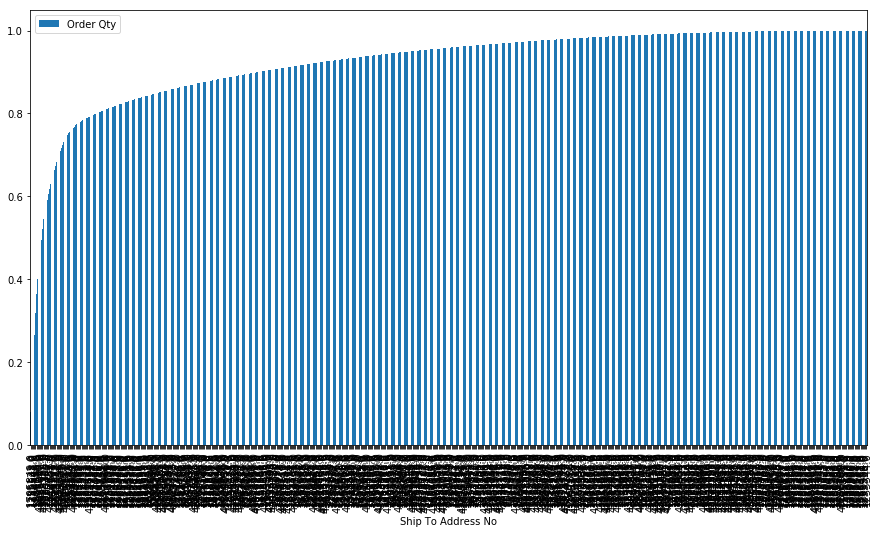

In [86]:
Value_Series.plot(kind='bar')

### From above plot we can predict that most of the clients falls in C then B and very few fallin A class

In [87]:
# just to check the results of cumsum avg
cumsumavg =  [x[0] for x in Value_Series.values.tolist()]
[print(cumsumavg[x]) for x in range(5)]

0.07967364313586378
0.143138592517805
0.2062651785957923
0.2646437634731356
0.3169481812972412


[None, None, None, None, None]

In [88]:
# performing step 4
classified = pd.DataFrame(["A" if x[0] < 0.8 else "B" if ((x[0] > 0.8) and (x[0] < 0.95)) else "C" for x in Value_Series.values.tolist()])
classified.head()

,0
0,A
1,A
2,A
3,A
4,A


In [89]:
#mapping ABC classification values with clients
classified.index = Value_Series.index
classified.columns = ['value']

In [90]:
#Checking the item codes and classes
print(classified.head())
print(classified.tail())

                   value
Ship To Address No      
1795849.0              A
1255123.0              A
1255548.0              A
1740542.0              A
1254798.0              A
                   value
Ship To Address No      
1255451.0              C
1255454.0              C
1255269.0              C
1255536.0              C
1255344.0              C


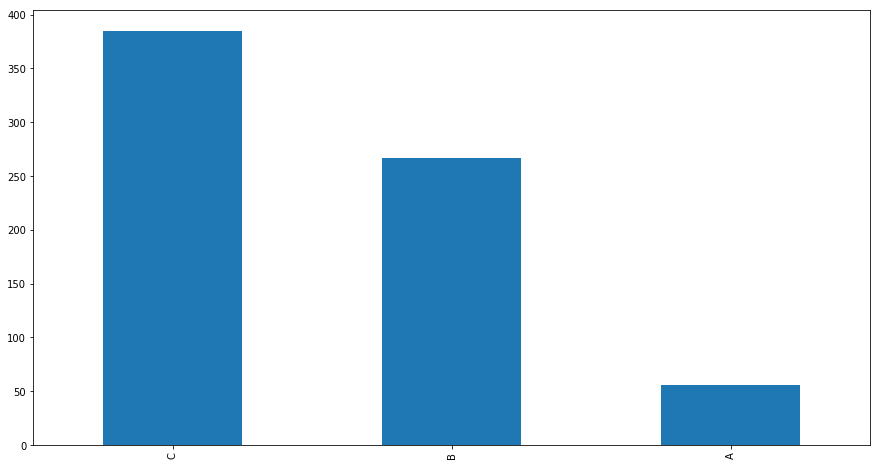

In [91]:
classified['value'].value_counts().plot(kind='bar')

### From above graph we can clearly see that most of clients fall under Category C which is aroun 380 from 708 unque clients. Around 265 clients fall under B category and remaining around 65 cleints fall in A category

In [92]:
# saving the output to a file
classified.to_csv("ABC_classification_Client_Sales.csv")